---
bibliography:
  - bibliography.bib
---

# Regularization Techniques

## Regularization Methods Example 1.1
In the figure below, the ridge regression coefficient estimates for the **Credit**  data set are displayed. Each curve corresponds to the ridge regression coefficient estimate for one of the ten variables, plotted as a function of $ \ln(\lambda) $. For example, the blue solid line represents the ridge regression estimate for the **income** coefficient, as $\lambda$ is varied. At the extreme left-hand side of the plot, $\lambda$ is essentially zero, and so the corresponding ridge coefficient estimates are the same as the usual least squares estimates. But as $\lambda$ increases, the ridge coefficient estimates shrink towards zero. When $\lambda$ is extremely large, then all of the ridge coefficient estimates are basically zero; this corresponds to the null model that contains no predictors.

While the ridge coefficient estimates tend to decrease in aggregate as $\lambda$ increases, individual coefficients, such as **rating** and **income**, may occasionally increase as $\lambda$ increases.

## Sklearn version:

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings("ignore")

# Load data
df = pd.read_csv('Regularization Techniques/data/Credit.csv', index_col="Unnamed: 0")

# Convert Categorical variables
df = pd.get_dummies(data=df, drop_first=True, 
                    prefix=('Gender_', 'Student_', 
                            'Married_', 'Ethnicity_'))

# Define target and predictors
x = df.drop(columns='Balance') 
y = df['Balance']

# Model for different lambda
n = 100
lambda_ = np.exp(np.linspace(-5, 5, n))

params = pd.DataFrame(columns=x.columns)
for i in range(n):
    reg = Ridge(alpha=lambda_[i], normalize=True)
    reg = reg.fit(x, y)
    params.loc[np.log(lambda_[i]), :] = reg.coef_

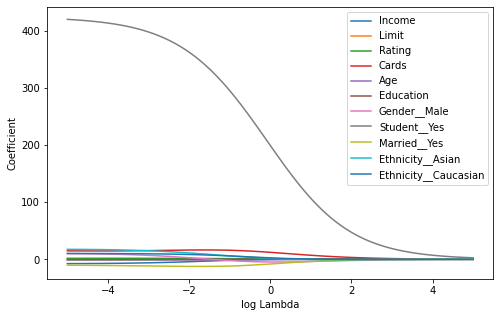

In [2]:
import matplotlib.pyplot as plt
# Plot
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
params.plot(ax=ax)
plt.xlabel("log Lambda")
plt.ylabel("Coefficient")
plt.legend()
plt.show()

## Statsmodels

Statsmodels seems to have some scaling wrt Alpha, which makes the results difficult to compare with R. (Allthough generally correct)
Furthermore, the implementation seems to be incomplete, for example the summary function is missing. 

In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import preprocessing

# Load data
df = pd.read_csv('Regularization Techniques/data/Credit.csv', index_col="Unnamed: 0")

# Convert Categorical variables
df = pd.get_dummies(data=df, drop_first=True, 
                    prefix=('Gender_', 'Student_', 
                            'Married_', 'Ethnicity_'))

# Define target and predictors
x = df.drop(columns='Balance') 
x = sm.add_constant(x)
y = df['Balance']

# Scale to 0 mean:
scaler = preprocessing.StandardScaler(with_std=False).fit(x)
x_scaled = scaler.transform(x)

# Model for different lambda
n = 100
lambda_ = np.linspace(-8, 4, n)
params = pd.DataFrame(columns=x.columns)

for lam in lambda_:
    model = sm.OLS(y, x_scaled)
    model = model.fit_regularized(alpha=np.exp(lam), L1_wt=0)
    params.loc[lam, :] = model.params

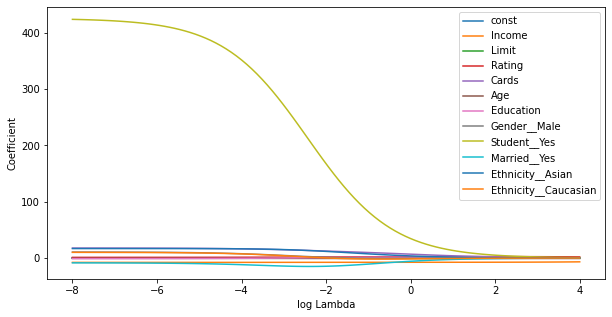

In [11]:
import matplotlib.pyplot as plt
# Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
params.plot(ax=ax)
plt.xlabel("log Lambda")
plt.ylabel("Coefficient")
plt.legend()
plt.show()



## Regularization Methods Example 1.2:
In the following, we will discuss the function **sklearn.linear\_model.Ridge()** in depth. Firstly, note that the qualitative predictors in x have to be transformed into dummy variables. The flag **normalize = True** makes sure that the predictors are mean centred and scaled to unit variance. When comparing to **R**, note that the implementation is slightly different, which makes it hard to compare coefficients as a function of lambda. The optimal solution however, will generally be the same. 

We will now perform ridge regression in order to predict **Balance** in the **Credit** data set.

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings("ignore")

# Load data
df = pd.read_csv('Regularization Techniques/data/Credit.csv', index_col="Unnamed: 0")

# Convert Categorical variables
df = pd.get_dummies(data=df, drop_first=True, 
                    prefix=('Gender_', 'Student_', 
                            'Married_', 'Ethnicity_'))

# Define target and predictors
x = df.drop(columns='Balance') 
y = df['Balance']

# Fit model:
lambda_ = 100
reg = Ridge(alpha=lambda_, normalize=True)
reg = reg.fit(x, y)

# Coefficient and corresponding predictors
coef = np.round(reg.coef_, 3)
# coef = scaler.inverse_transform(coef)
x_cols = x.columns.values

We expect the coefficient estimates to be much smaller, in terms of $\ell_2$ norm, when a large value of $\lambda$ is used, as compared to when a small value of $\lambda$ is used. These are the coefficients when $\lambda = 100$, along with their $\ell_2$ norm:


In [5]:
print(pd.DataFrame(data={'Feature': x_cols,
                         'Coefficient':coef}),
      '\n\nl2-norm:', np.sqrt(np.sum(coef**2)))

                 Feature  Coefficient
0                 Income        0.006
1                  Limit        0.000
2                 Rating        0.003
3                  Cards        0.029
4                    Age        0.000
5              Education       -0.001
6           Gender__Male       -0.020
7           Student__Yes        0.396
8           Married__Yes       -0.005
9       Ethnicity__Asian       -0.010
10  Ethnicity__Caucasian       -0.003 

l2-norm: 0.3977901456798547


In contrast, here are the coefficients when $\lambda = 50$, along with their $\ell_2$ norm. Note the much larger $\ell_2$ norm of the coefficients associated with this smaller value of $\lambda$.

In [3]:
# Fit model:
lambda_ = 50
reg = Ridge(alpha=lambda_, normalize=True)
reg = reg.fit(x, y)

# Coefficient and corresponding predictors
coef = np.round(reg.coef_, 3)
x_cols = x.columns.values

print(pd.DataFrame(data={'Feature': x_cols,
                         'Coefficient':coef}),
      '\n\nl2-norm:', np.sqrt(np.sum(coef**2)))

                 Feature  Coefficient
0                 Income        0.112
1                  Limit        0.003
2                 Rating        0.049
3                  Cards        0.563
4                    Age       -0.002
5              Education       -0.021
6           Gender__Male       -0.379
7           Student__Yes        7.773
8           Married__Yes       -0.123
9       Ethnicity__Asian       -0.183
10  Ethnicity__Caucasian       -0.052 

l2-norm: 7.806846994786052


The standard least squares coefficient estimates are scale equivariant: multiplying a predictor variable $X_j$ by a constant $c$ simply leads to a scaling of the least squares coefficient estimates by a factor of $1/c$. In other words, regardless of how the $j$th predictor is scaled, $\hat{\beta}_j X_j $ will remain the
same. In contrast, the ridge regression coefficient estimates can change substantially when multiplying a given predictor by a constant. For instance, consider the **income** variable, which is measured in dollars. One could reasonably have measured income in thousands of dollars, which would result in a reduction in the observed values of income by a factor of $1000$. Now due to the sum of squared coefficients in the ridge regression formulation equation, such a change in scale will not simply cause the ridge regression coefficient estimate for **income** to change by a factor of $1000$. In other words,
$\hat{\beta}_j X_{j,\lambda}^{R} $ will depend not only on the value of $\lambda$, but also on the scaling of the $j$th predictor. In fact, the value of $\hat{\beta}_j X_{j,\lambda}^{R} $ may even depend on the scaling of the other predictors. Therefore, it is best to apply ridge regression after standardizing the predictors.

Note that by default, the **Ridge()** function does not standardizes the variables. To turn on scaling, use the argument **normalize = True**.

## Regularization Methods Example 2.3:
In order to fit a lasso model, we use the **sklearn.linear\_model.Lasso()** function, which behaves very similar to the **Ridge()** function. 

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore")

# Load data
df = pd.read_csv('Regularization Techniques/data/Credit.csv', index_col="Unnamed: 0")

# Convert Categorical variables
df = pd.get_dummies(data=df, drop_first=True, 
                    prefix=('Gender_', 'Student_', 
                            'Married_', 'Ethnicity_'))

# Define target and predictors
x = df.drop(columns='Balance') 
y = df['Balance']

# Fit model:
lambda_ = 5
reg = Lasso(alpha=lambda_, normalize=True)
reg = reg.fit(x, y)

# Coefficient and corresponding predictors
coef = np.round(reg.coef_, 3)
x_cols = x.columns.values

We expect the coefficient estimates to be much smaller, in terms of $\ell_2$ norm, when a large value of $\lambda$ is used, as compared to when a small value of $\lambda$ is used. These are the coefficients when $\lambda = 5$, along with their $\ell_2$ norm:

In [4]:
print(pd.DataFrame(data={'Feature': x_cols,
                         'Coefficient':coef}),
      '\n\nl2-norm:', np.sqrt(np.sum(coef**2)))

                 Feature  Coefficient
0                 Income       -0.000
1                  Limit        0.010
2                 Rating        1.769
3                  Cards        0.000
4                    Age       -0.000
5              Education        0.000
6           Gender__Male       -0.000
7           Student__Yes       65.438
8           Married__Yes       -0.000
9       Ethnicity__Asian        0.000
10  Ethnicity__Caucasian       -0.000 

l2-norm: 65.46190728202167


In contrast, here are the coefficients when $\lambda = 0.5$, along with their $\ell_2$ norm. Note the much higher $\ell_2$ norm of the coefficients associated with this lower value of $\lambda$.

In [5]:
# Fit model:
lambda_ = 0.5
reg = Lasso(alpha=lambda_, normalize=True)
reg = reg.fit(x, y)

# Coefficient and corresponding predictors
coef = np.round(reg.coef_, 3)
x_cols = x.columns.values

print(pd.DataFrame(data={'Feature': x_cols,
                         'Coefficient':coef}),
      '\n\nl2-norm:', np.sqrt(np.sum(coef**2)))

                 Feature  Coefficient
0                 Income       -6.491
1                  Limit        0.145
2                 Rating        1.508
3                  Cards        9.417
4                    Age       -0.236
5              Education       -0.000
6           Gender__Male        0.000
7           Student__Yes      387.093
8           Married__Yes       -0.000
9       Ethnicity__Asian        0.000
10  Ethnicity__Caucasian        0.000 

l2-norm: 387.26496666236153


As we can observe, several coefficients have become zero. The larger the value of $\lambda$ the more coefficients become zero. Variable selection thus is generically implemented in the lasso.

### Figure

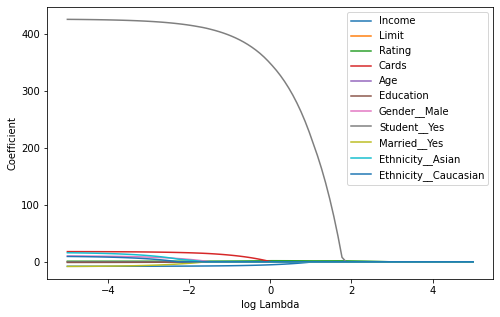

In [10]:
import matplotlib.pyplot as plt

# Model for different lambda
n = 100
lambda_ = np.exp(np.linspace(-5, 5, n))

params = pd.DataFrame(columns=x.columns)
for i in range(n):
    reg = Lasso(alpha=lambda_[i], normalize=True)
    reg = reg.fit(x, y)
    params.loc[np.log(lambda_[i]), :] = reg.coef_
    
# Plot
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
params.plot(ax=ax)
plt.xlabel("log Lambda")
plt.ylabel("Coefficient")
plt.legend()
plt.show()

### Regularization Methods Example 2.4:
We now split the samples of the **Credit** data set into a training set and a test set in order to estimate the test error of ridge regression and the lasso. The splitting can be easily achieved using the **train\_test\_split()** function from **sklearn.model\_selection**. 
We first set a random seed so that the results obtained will be reproducible.

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv('Regularization Techniques/data/Credit.csv', index_col="Unnamed: 0")

# Convert Categorical variables
df = pd.get_dummies(data=df, drop_first=True, 
                    prefix=('Gender_', 'Student_', 
                            'Married_', 'Ethnicity_'))

# Define target and predictors
x = df.drop(columns='Balance') 
y = df['Balance']

# Split in test and train set
np.random.seed(10)
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.5)

We now split the samples of the **Credit** data set into a training set and a test set in order to estimate the test error of ridge regression and the lasso. 
The splitting can be easily achieved using the **train\_test\_split()** function from **sklearn.model\_selection**. We first set a random seed so that the results obtained will be reproducible.

In [4]:
import warnings
warnings.filterwarnings("ignore")


# Model for lambda=4
params = pd.DataFrame(columns=x.columns)
lambda_ = 4

# Fit model:
reg = Ridge(alpha=lambda_, normalize=True)
reg = reg.fit(x_train, y_train)

# Coeficient and coresponding predictors
coef = np.round(reg.coef_, 3)
x_cols = x.columns.values

print(pd.DataFrame(data={'Feature': x_cols,
                         'Coefficient':coef}))

# Predict and calculate MSE on test-set
y_pred = reg.predict(x_test)
MSE = np.mean((y_pred - y_test)**2)
print("\nMSE:", np.round(MSE, 1))

                 Feature  Coefficient
0                 Income        0.656
1                  Limit        0.028
2                 Rating        0.418
3                  Cards        4.490
4                    Age       -0.323
5              Education       -0.251
6           Gender__Male       -8.147
7           Student__Yes       99.132
8           Married__Yes        3.622
9       Ethnicity__Asian       -1.485
10  Ethnicity__Caucasian        1.972

MSE: 116077.3


The test MSE is $116077.3$. Note that if we had instead simply fit a model with just an intercept, we would have predicted each test observation using the mean of the training observations. In that case, we could compute the test set MSE like this:

In [5]:
MSE = np.mean((np.mean(y_train) - y_test)**2)
print("MSE:", np.round(MSE, 1))

MSE: 214872.8


We could also get the same result by fitting a ridge regression model with a very large value of $\lambda$. 

In [6]:
# Model for lambda=inf
lambda_ = 1e10

# Fit model:
reg = Ridge(alpha=lambda_, normalize=True)
reg = reg.fit(x_train, y_train)

# Coeficient and coresponding predictors
coef = np.round(reg.coef_, 3)
x_cols = x.columns.values

print(pd.DataFrame(data={'Feature': x_cols,
                         'Coefficient':coef}))

# Predict and calculate MSE on test-set
y_pred = reg.predict(x_test)
MSE = np.mean((y_pred - y_test)**2)
print("\nMSE:", np.round(MSE, 1))

                 Feature  Coefficient
0                 Income          0.0
1                  Limit          0.0
2                 Rating          0.0
3                  Cards          0.0
4                    Age         -0.0
5              Education         -0.0
6           Gender__Male         -0.0
7           Student__Yes          0.0
8           Married__Yes          0.0
9       Ethnicity__Asian         -0.0
10  Ethnicity__Caucasian          0.0

MSE: 214872.8


So fitting a ridge regression model with $\lambda = 4$ leads to a much lower test MSE than fitting a model with just an intercept. We now check whether there is any benefit to performing ridge regression with $\lambda = 4$ instead of just performing least squares regression. Recall that least squares is simply ridge regression with $\lambda=0$.

In [7]:
# Model for lambda=0
lambda_ = 0

# Fit model:
reg = Ridge(alpha=lambda_, normalize=True)
reg = reg.fit(x_train, y_train)

# Coeficient and coresponding predictors
coef = np.round(reg.coef_, 3)
x_cols = x.columns.values

print(pd.DataFrame(data={'Feature': x_cols,
                         'Coefficient':coef}))

# Predict and calculate MSE on test-set
y_pred = reg.predict(x_test)
MSE = np.mean((y_pred - y_test)**2)
print("\nMSE:", np.round(MSE, 1))

                 Feature  Coefficient
0                 Income       -7.666
1                  Limit        0.168
2                 Rating        1.421
3                  Cards       20.156
4                    Age       -0.333
5              Education        0.942
6           Gender__Male      -13.405
7           Student__Yes      455.791
8           Married__Yes      -10.613
9       Ethnicity__Asian       18.956
10  Ethnicity__Caucasian       27.706

MSE: 10730.6


The MSE resulting form Ridge regression with $\lambda=4$ is larger than the MSE resulting from least squares which is not surprising since we have arbitrarily chosen $\lambda=4$.

In general, instead of arbitrarily choosing $\lambda=4$, it would be better to use cross-validation to choose the tuning parameter $\lambda$.

### Regularization Methods Example 2.5:
We can do this using the **RidgeCV()** function. By default, the number of folds equals the number of observations (*leave-one-out*), but this can be changed using the **cv** setting. 

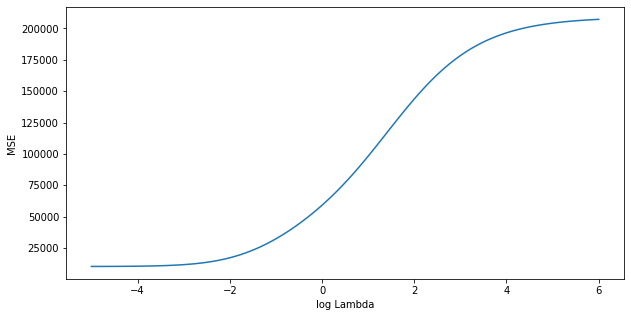

In [8]:
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt

n=100
lambda_ = np.exp(np.linspace(-5, 6, n))

# Fit model:
reg = RidgeCV(alphas=lambda_, store_cv_values=True, normalize=True)
reg = reg.fit(x_train, y_train)

# Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.log(lambda_), np.mean(reg.cv_values_, axis=0))
plt.xlabel("log Lambda")
plt.ylabel("MSE")
plt.show()

In [9]:
print("Best Lambda:", np.round(reg.alpha_, 3))

Best Lambda: 0.007


Therefore, we see that the value of $\lambda$ that results in the smallest cross-validation error is $0.007$. What is the test MSE associated with this value of
$\lambda$?


In [10]:
# Predict and calculate MSE on test-set
y_pred = reg.predict(x_test)
MSE = np.mean((y_pred - y_test)**2)
print("MSE:", np.round(MSE, 1))

MSE: 10894.1


Note that the best model is already returned by **RidgeCV**, we dont need to fit it again. The test MSE does represent an improvement over the test MSE we got using $\lambda=4$. Now we can also find the coefficients of the model. 

In [11]:
# Coeficient and coresponding predictors
coef = np.round(reg.coef_, 3)
x_cols = x.columns.values

print(pd.DataFrame(data={'Feature': x_cols,
                         'Coefficient':coef}))

                 Feature  Coefficient
0                 Income       -7.406
1                  Limit        0.139
2                 Rating        1.803
3                  Cards       18.373
4                    Age       -0.382
5              Education        0.984
6           Gender__Male      -13.514
7           Student__Yes      451.436
8           Married__Yes      -10.541
9       Ethnicity__Asian       20.025
10  Ethnicity__Caucasian       28.396


### Regularization Methods Example 2.6
We now ask whether the lasso can yield either a more accurate or a more interpretable model than ridge regression.

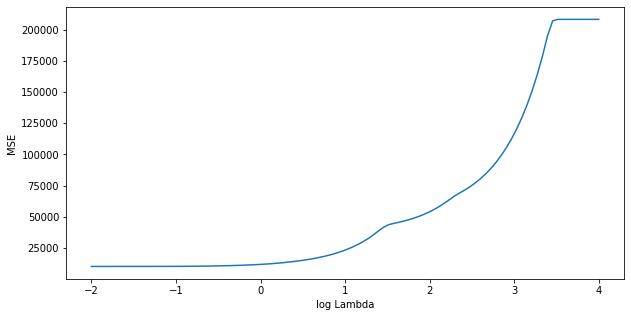

In [12]:
from sklearn.linear_model import LassoCV

lambda_ = np.exp(np.linspace(-2, 4, n))

# Fit model:
reg = LassoCV(alphas=lambda_, normalize=True)
reg = reg.fit(x_train, y_train)

# Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.log(reg.alphas_), np.mean(reg.mse_path_, axis=1))
plt.xlabel("log Lambda")
plt.ylabel("MSE")
plt.show()

We can see from the coefficient plot that depending on the choice of tuning parameter, some of the coefficients will be exactly equal to zero. We now compute the associated test error.

In [13]:
# Predict and calculate MSE on test-set
y_pred = reg.predict(x_test)
MSE = np.mean((y_pred - y_test)**2)
print("Best Lambda:", np.round(reg.alpha_, 3), "\nMSE:", np.round(MSE, 1))

Best Lambda: 0.135 
MSE: 10538.4


This is substantially lower than the test set MSE of the null model, the test MSE of ridge regression with $\lambda$ chosen by cross-validation, and very similar to least squares. Finally, we will have a look at the corresponding coefficients.

In [14]:
# Coeficient and coresponding predictors
coef = np.round(reg.coef_,  3)
x_cols = x.columns.values

print(pd.DataFrame(data={'Feature': x_cols,
                         'Coefficient':coef}))

                 Feature  Coefficient
0                 Income       -7.410
1                  Limit        0.166
2                 Rating        1.392
3                  Cards       18.422
4                    Age       -0.277
5              Education        0.111
6           Gender__Male       -8.978
7           Student__Yes      448.564
8           Married__Yes       -4.421
9       Ethnicity__Asian        7.698
10  Ethnicity__Caucasian       17.483


In this example, all coefficients are different from zero.

### Regularization Methods Example 2.7
Finally, we will discuss the **Advertising** data set.

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Load data
df = pd.read_csv('Regularization Techniques/data/Advertising.csv', index_col="Unnamed: 0")

# Define target and predictors
x = df.drop(columns='sales') 
y = df['sales']

# Split in test and train set
np.random.seed(3)
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.5)

# Fit model:
clf = LassoCV(normalize=True)
clf = clf.fit(x_train, y_train)

# Predict and calculate MSE on test-set
y_pred = clf.predict(x_test)
MSE = np.mean((y_pred - y_test)**2)
print("Best Lambda:", np.round(clf.alpha_, 3), "\nMSE:", np.round(MSE, 1))

# Coeficient and coresponding predictors
coef = np.round(clf.coef_,  3)
x_cols = x.columns.values

print(pd.DataFrame(data={'Feature': x_cols,
                         'Coefficient':coef}))

Best Lambda: 0.014 
MSE: 3.7
     Feature  Coefficient
0         TV        0.041
1      radio        0.183
2  newspaper       -0.000


In this case, the lasso automatically omits the predictor variable **newspaper**.

### Regularization Methods Example 4.1:
Here we use **GradientBoostingRegressor()** from **sklearn.ensemble**, to fit a boosted regression trees model to the Boston data set. The argument **n\_estimators=5000** indicates that we want $5000$ trees, the option **max\_depth=4** limits the depth of each tree, and **learning\_rate=0.001** shrinks the contribution of each tree.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Load data
df = pd.read_csv('Regularization Techniques/data/Boston.csv', index_col=0)

# Define target and predictors
x = df.drop(columns='medv') 
y = df['medv']

# Split in test and train set
np.random.seed(1)
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.5)

# Fit model:
reg = GradientBoostingRegressor(n_estimators=5000, max_depth=4, 
                                learning_rate=0.001)
reg = reg.fit(x_train, y_train)

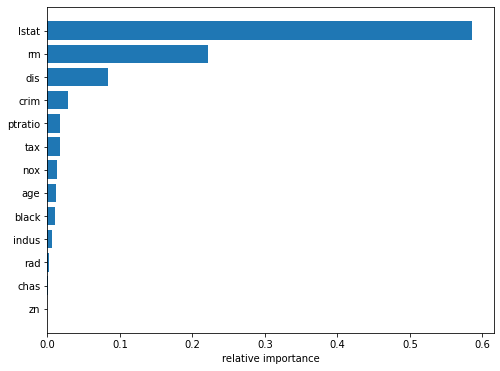

In [2]:
import matplotlib.pyplot as plt

# Feature Importances based on the impurity decrease
importance = reg.feature_importances_
features = x_train.columns.values

# Sort by importance
features = features[np.argsort(importance)]
importance = importance[np.argsort(importance)]

# plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.barh(features, importance)
ax.set_xlabel("relative importance")
plt.show()

We see that **lstat** and **rm** are by far the most important variables. 

We now use the boosted model to predict **medv** on the test set:

In [4]:
from sklearn.metrics import mean_squared_error

# Predict
pred = reg.predict(x_test)

# MSE
MSE = mean_squared_error(y_test, pred)
print("MSE:", np.round(MSE, 3))

MSE: 10.675


The test MSE obtained is $10.361$; similar to the test MSE for random forests and superior to that for bagging. If we want to, we can perform boosting with a different value of the shrinkage parameter $\lambda$. The default value is $0.1$, but this is easily modified. Here we take $\lambda = 0.2$.

In [5]:
# Fit model with higher learning rate:
reg = GradientBoostingRegressor(n_estimators=5000, max_depth=4, learning_rate=0.2)
reg = reg.fit(x_train, y_train)

# Predict
pred = reg.predict(x_test)

# MSE
MSE = mean_squared_error(y_test, pred)
print("MSE:", np.round(MSE, 3))

MSE: 10.228


In this case, using $\lambda = 0.2$ leads to a slightly lower test MSE than $\lambda = 0.001$.

### Regularization Methods Example 5.1


The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. In this example, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (i.e. `name`, `age`, `gender`, `socio-economic class`, etc).

In this example, we will compare the impurity-based feature importance of `RandomForestClassifier` with the permutation importance on the `Titanic` dataset using `permutation_importance`. We will show that the impurity-based feature importance can inflate the importance of numerical features.


Furthermore, the impurity-based feature importance of random forests suffers from being computed on statistics derived from the training dataset: the importances can be high even for features that are not predictive of the target variable, as long as the model has the capacity to use them to overfit.

This example shows how to use _Permutation Importances_ as an alternative that can mitigate those limitations.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

#### Data Loading and Feature Engineering

Let’s use pandas to load a copy of the titanic dataset. The following shows how to apply separate preprocessing on numerical and categorical features.

We further include two random variables that are not correlated in any way with the target variable (survived):

- `random_num` is a high cardinality numerical variable (as many unique values as records).

- `random_cat` is a low cardinality categorical variable (3 possible values).

In [5]:
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
rng = np.random.RandomState(seed=42)
X["random_cat"] = rng.randint(3, size=X.shape[0])
X["random_num"] = rng.randn(X.shape[0])

categorical_columns = ["pclass", "sex", "embarked", "random_cat"]
numerical_columns = ["age", "sibsp", "parch", "fare", "random_num"]

X = X[categorical_columns + numerical_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

categorical_encoder = OneHotEncoder(handle_unknown="ignore")
numerical_pipe = Pipeline([("imputer", SimpleImputer(strategy="mean"))])

preprocessing = ColumnTransformer(
    [
        ("cat", categorical_encoder, categorical_columns),
        ("num", numerical_pipe, numerical_columns),
    ]
)

rf = Pipeline(
    [
        ("preprocess", preprocessing),
        ("classifier", RandomForestClassifier(random_state=42)),
    ]
)
rf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['pclass', 'sex', 'embarked',
                                                   'random_cat']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['age', 'sibsp', 'parch',
                                                   'fare', 'random_num'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

#### Accuracy of the Model

Prior to inspecting the feature importances, it is important to check that the model predictive performance is high enough. Indeed there would be little interest of inspecting the important features of a non-predictive model.

Here one can observe that the train accuracy is very high (the forest model has enough capacity to completely memorize the training set) but it can still generalize well enough to the test set thanks to the built-in bagging of random forests.

It might be possible to trade some accuracy on the training set for a slightly better accuracy on the test set by limiting the capacity of the trees (for instance by setting `min_samples_leaf=5` or `min_samples_leaf=10`) so as to limit overfitting while not introducing too much underfitting.

However let’s keep our high capacity random forest model for now so as to illustrate some pitfalls with feature importance on variables with many unique values.

In [6]:
print("RF train accuracy: %0.3f" % rf.score(X_train, y_train))
print("RF test accuracy: %0.3f" % rf.score(X_test, y_test))

RF train accuracy: 1.000
RF test accuracy: 0.817


#### Tree’s Feature Importance from Mean Decrease in Impurity (MDI)

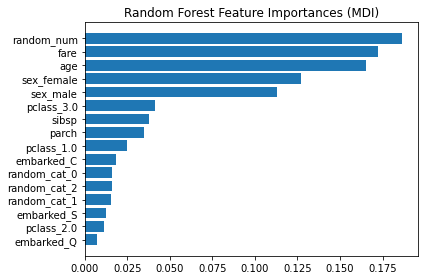

In [8]:
ohe = rf.named_steps["preprocess"].named_transformers_["cat"]
feature_names = ohe.get_feature_names(categorical_columns)
feature_names = np.r_[feature_names, numerical_columns]

tree_feature_importances = rf.named_steps["classifier"].feature_importances_
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots()
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.savefig('rf_importance_mdi.png')
plt.show()

The impurity-based feature importance ranks the numerical features to be the most important features. As a result, the non-predictive `random_num` variable is ranked the most important!

This problem stems from two limitations of impurity-based feature importances:

- impurity-based importances are biased towards high cardinality features;

- impurity-based importances are computed on training set statistics and therefore do not reflect the ability of feature to be useful to make predictions that generalize to the test set (when the model has enough capacity).

As an alternative, the permutation importances of `rf` are computed on a held out test set. This shows that the low cardinality categorical feature, `sex` is the most important feature.

Also note that both random features have very low importances (close to 0) as expected.

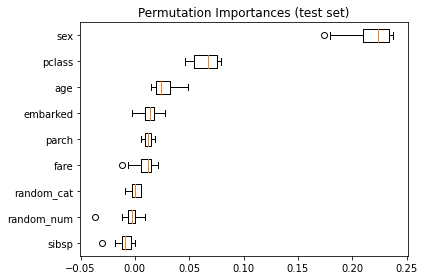

In [9]:
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx]
)
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.savefig('RT_Example_5_1_d.png')
plt.show()

It is also possible to compute the permutation importances on the training set. This reveals that `random_num` gets a significantly higher importance ranking than when computed on the test set. The difference between those two plots is a confirmation that the RF model has enough capacity to use that random numerical feature to overfit. You can further confirm this by re-running this example with constrained RF with `min_samples_leaf=10`.

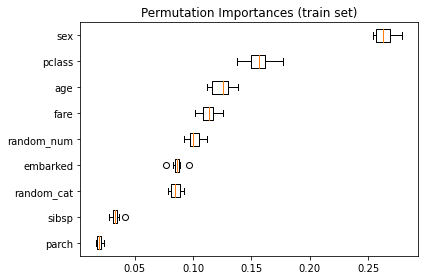

In [10]:
result = permutation_importance(
    rf, X_train, y_train, n_repeats=10, random_state=42
)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=X_train.columns[sorted_idx]
)
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

### Regularization Methods Example 5.2

In example 4.1 we saw that **lstat** and **rm** are by far the most important variables. We can also produce partial dependence plots for these two variables. 

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Load data
df = pd.read_csv('Regularization Techniques/data/Boston.csv', index_col=0)

# Define target and predictors
x = df.drop(columns='medv') 
y = df['medv']

# Split in test and train set
np.random.seed(1)
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.5)

# Fit model:
reg = GradientBoostingRegressor(n_estimators=5000, max_depth=4, 
                                learning_rate=0.001)
reg = reg.fit(x_train, y_train)

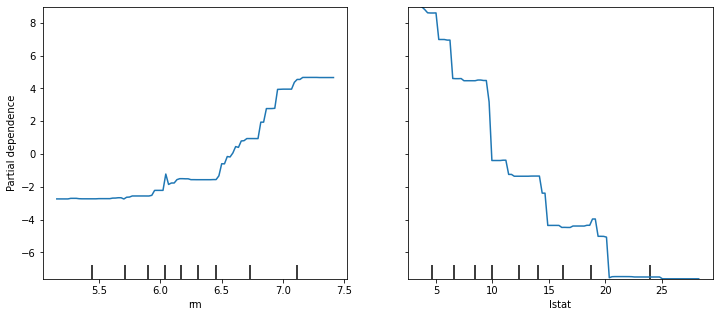

In [9]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import plot_partial_dependence
import matplotlib.pyplot as plt
import pandas as pd

# Plotting partial dependence
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)
plot_partial_dependence(reg, x_train, ['rm', 'lstat'], ax=ax, kind='average') 
plt.show()

These partial dependence plots illustrate the marginal effect of the selected variables on the response after integrating out the other variables. In this case, as we might expect, median house prices are increasing with **rm** and decreasing with **lstat**.